Cell Imports & Load Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8")

df=pd.read_parquet("../data_clean/crimes_featured.parquet")
df.head()

,ID,case_number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location,Month,Day,Hour,DayOfWeek,Month_Name,Quarter,Is_Weekend,Time_Of_Day,Has_Coordinates,Is_Domestic,Crime_Category,Arrest_Flag
0,14015267,JJ472734,2025-10-31,054XX S KEDZIE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESTAURANT,True,True,822,8,14,63,08B,1155979.0,1868152.0,2025,2025-11-07 15:42:00,41.793997,-87.703570,POINT (-87.703570315 41.793996879),10,31,0,Friday,October,4,False,Night,True,1,Violent Crime,1
1,14018155,JJ476333,2025-10-31,071XX S SAWYER AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,831,8,17,66,11,1155939.0,1857078.0,2025,2025-11-07 15:42:00,41.763609,-87.704014,POINT (-87.704014175 41.763608983),10,31,0,Friday,October,4,False,Night,True,0,Other Crime,0
2,14017696,JJ475588,2025-10-31,060XX N KENMORE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,APARTMENT,False,False,2433,24,48,77,11,1168151.0,1940184.0,2025,2025-11-07 15:42:00,41.991404,-87.656854,POINT (-87.656853651 41.991404284),10,31,0,Friday,October,4,False,Night,True,0,Other Crime,0
3,14015980,JJ473563,2025-10-31,026XX W CATALPA AVE,560,ASSAULT,SIMPLE,STREET,False,False,2011,20,40,4,08A,1157850.0,1936430.0,2025,2025-11-07 15:42:00,41.981320,-87.694846,POINT (-87.694846469 41.981320174),10,31,0,Friday,October,4,False,Night,True,0,Violent Crime,0
4,14019363,JJ477308,2025-10-31,031XX S LOWE AVE,810,THEFT,OVER $500,STREET,False,False,915,9,11,60,6,1172479.0,1883985.0,2025,2025-11-07 15:42:00,41.837097,-87.642599,POINT (-87.642599028 41.837096547),10,31,0,Friday,October,4,False,Night,True,0,Property Crime,0


Basic Info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1048575 non-null  int64         
 1   case_number           1048575 non-null  object        
 2   Date                  1048575 non-null  datetime64[ns]
 3   Block                 1048575 non-null  object        
 4   IUCR                  1048575 non-null  object        
 5   Primary_Type          1048575 non-null  object        
 6   Description           1048575 non-null  object        
 7   Location_Description  1048575 non-null  object        
 8   Arrest                1048575 non-null  bool          
 9   Domestic              1048575 non-null  bool          
 10  Beat                  1048575 non-null  int64         
 11  District              1048575 non-null  int64         
 12  Ward                  1048575 non-null  in

Missing Values

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\3383563935.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="viridis")


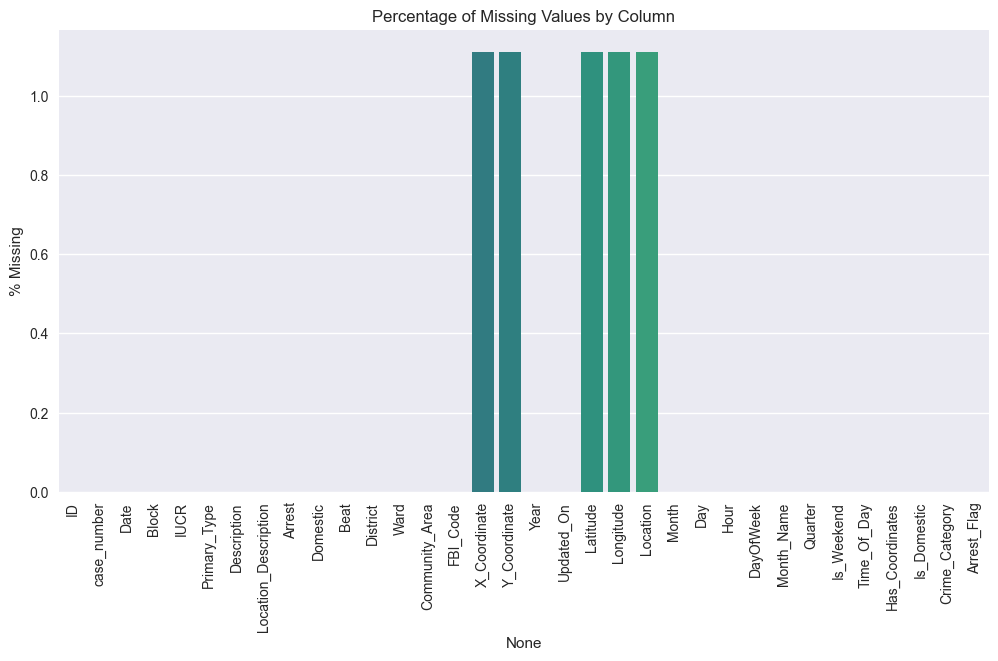

In [16]:
missing = df.isnull().mean() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Percentage of Missing Values by Column")
plt.xticks(rotation=90)
plt.ylabel("% Missing")
plt.show()


Summary Statistics

In [17]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,1048575.0,NaN,NaN,NaN,13202417.524403,26183.0,12847675.5,13233775.0,13620280.5,14021823.0,799538.107699
case_number,1048575,1048445,JF505994,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1048575,NaN,NaN,NaN,2023-10-01 09:23:29.354206976,2021-08-07 23:31:00,2022-09-29 00:00:00,2023-09-29 21:30:00,2024-09-28 22:00:00,2025-10-31 00:00:00,NaN
Block,1048575,36063,001XX N STATE ST,2784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUCR,1048575,363,486,82342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary_Type,1048575,31,THEFT,237954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1048575,340,SIMPLE,124923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Description,1048575,149,STREET,289518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrest,1048575,2,False,911345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domestic,1048575,2,False,852478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Crime Count Overview

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\3107675497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Year", palette="viridis")


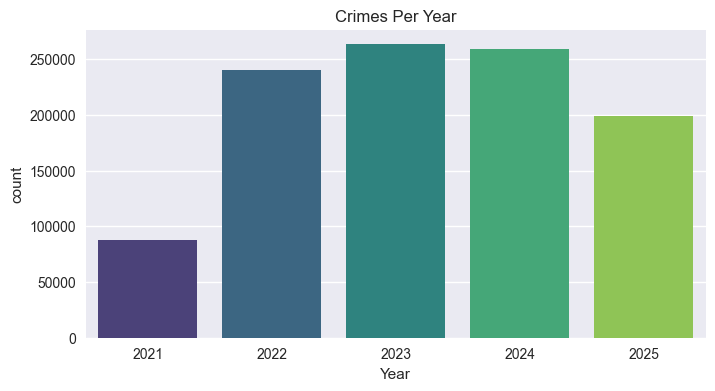

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Year", palette="viridis")
plt.title("Crimes Per Year")
plt.show()

Top 15 Crime Types

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\3880709075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_types.values, y=top_types.index, palette="coolwarm")


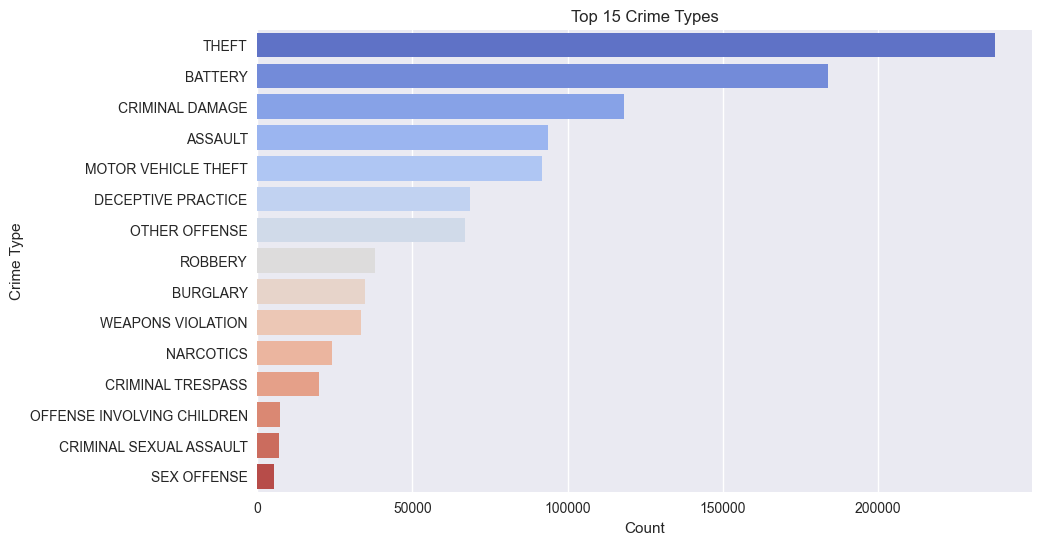

In [19]:
top_types = df["Primary_Type"].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_types.values, y=top_types.index, palette="coolwarm")
plt.title("Top 15 Crime Types")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

Crime Categories

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\2824329685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Crime_Category", palette="Set2")


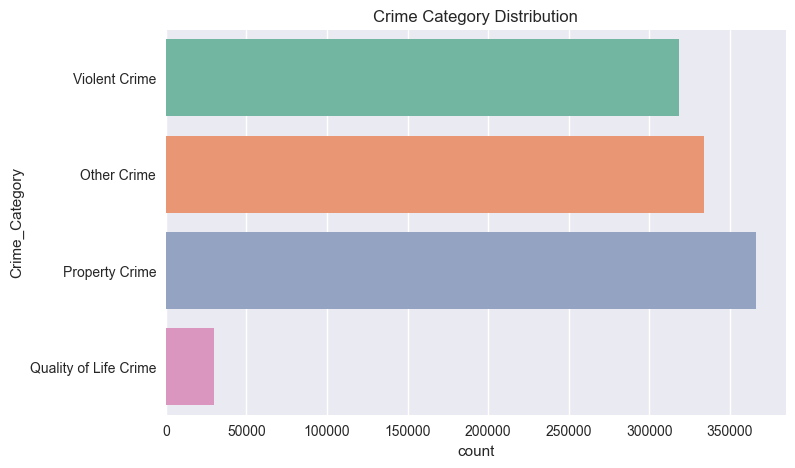

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="Crime_Category", palette="Set2")
plt.title("Crime Category Distribution")
plt.show()

Arrest Rate by Crime Type

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\3513001427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrest_rate.values, y=arrest_rate.index, palette="magma")


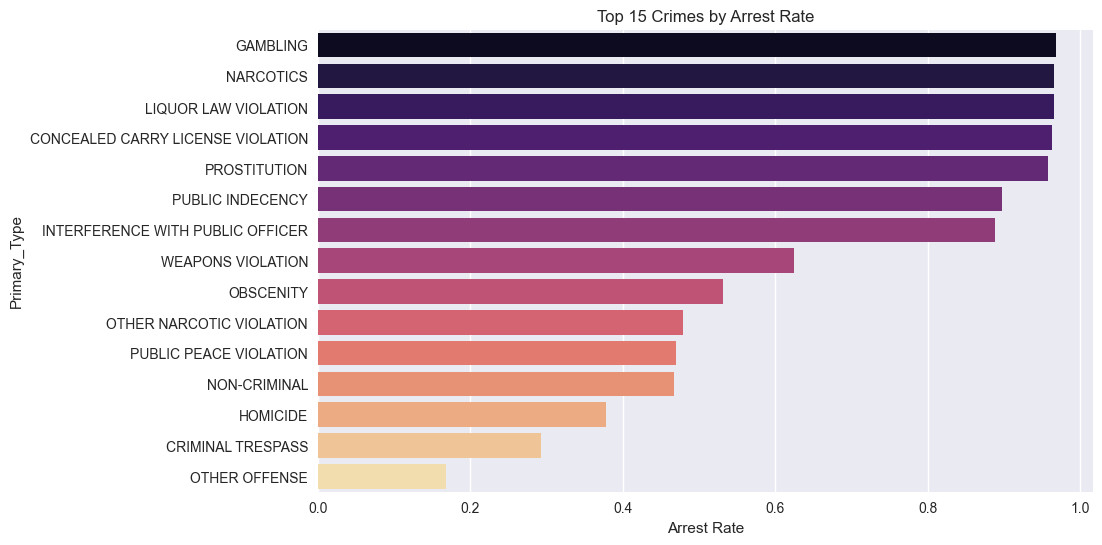

In [21]:
arrest_rate = (df.groupby("Primary_Type")["Arrest_Flag"]
                 .mean()
                 .sort_values(ascending=False)
                 .head(15))

plt.figure(figsize=(10, 6))
sns.barplot(x=arrest_rate.values, y=arrest_rate.index, palette="magma")
plt.title("Top 15 Crimes by Arrest Rate")
plt.xlabel("Arrest Rate")
plt.show()

Domestic vs Non-Domestic Crimes

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\580469162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Domestic", palette="Set1")


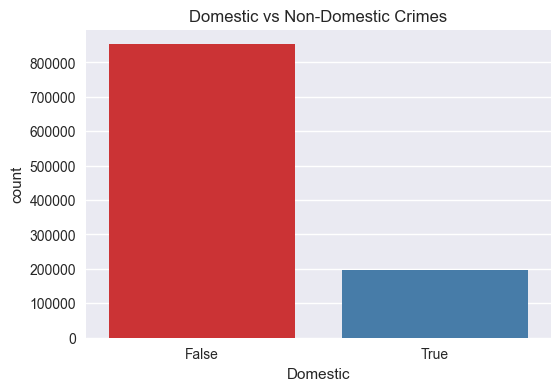

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Domestic", palette="Set1")
plt.title("Domestic vs Non-Domestic Crimes")
plt.show()

Location Description

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\46727094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locs.values, y=top_locs.index, palette="Blues_r")


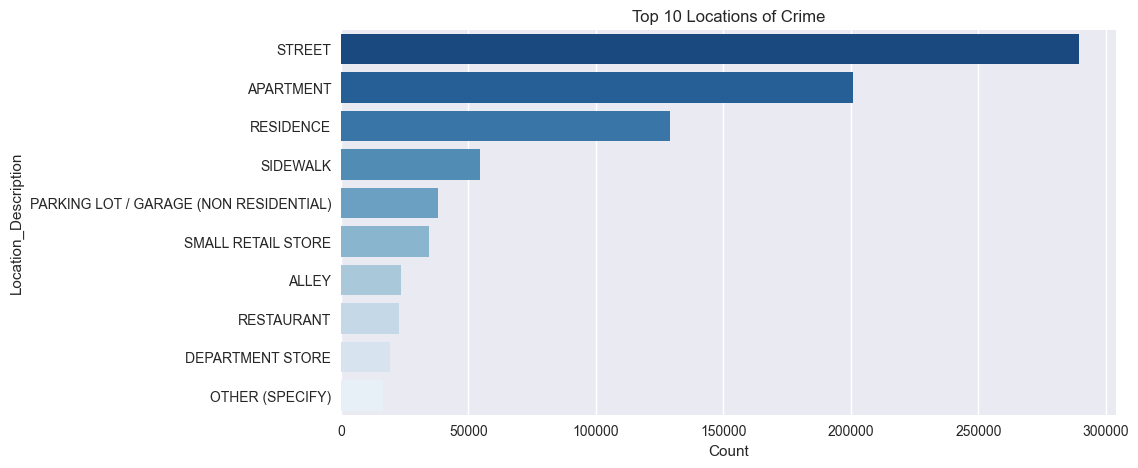

In [23]:
top_locs = df["Location_Description"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_locs.values, y=top_locs.index, palette="Blues_r")
plt.title("Top 10 Locations of Crime")
plt.xlabel("Count")
plt.show()

Hourly Crime Patterns

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\1899035268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Hour", palette="coolwarm")


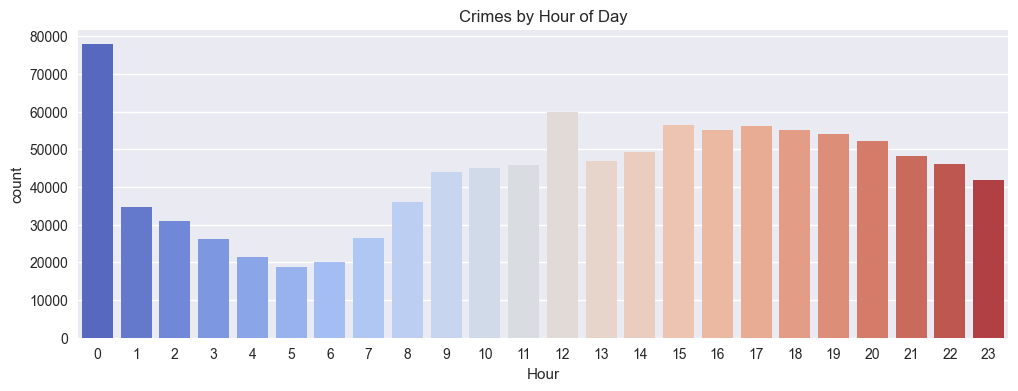

In [24]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="Hour", palette="coolwarm")
plt.title("Crimes by Hour of Day")
plt.show()

Day of Week Patterns

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\2095974658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="DayOfWeek", palette="Set3", order=[


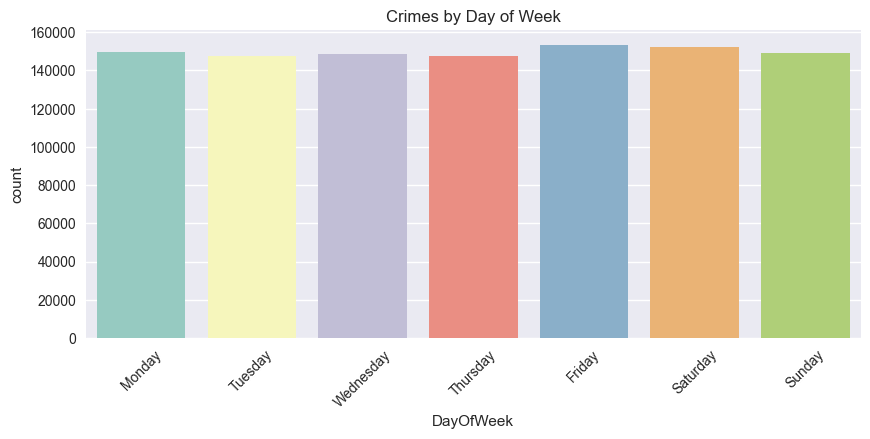

In [25]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="DayOfWeek", palette="Set3", order=[
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
])
plt.title("Crimes by Day of Week")
plt.xticks(rotation=45)
plt.show()

Crimes by Month

C:\Users\darsh\AppData\Local\Temp\ipykernel_31828\1149438846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Month_Name", palette="viridis",


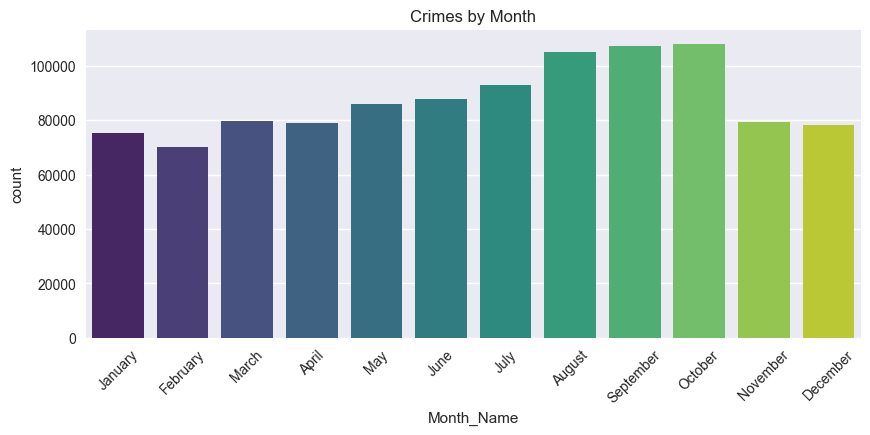

In [26]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Month_Name", palette="viridis",
              order=["January","February","March","April","May","June",
                     "July","August","September","October","November","December"])
plt.title("Crimes by Month")
plt.xticks(rotation=45)
plt.show()

Heatmap: Hour vs Day

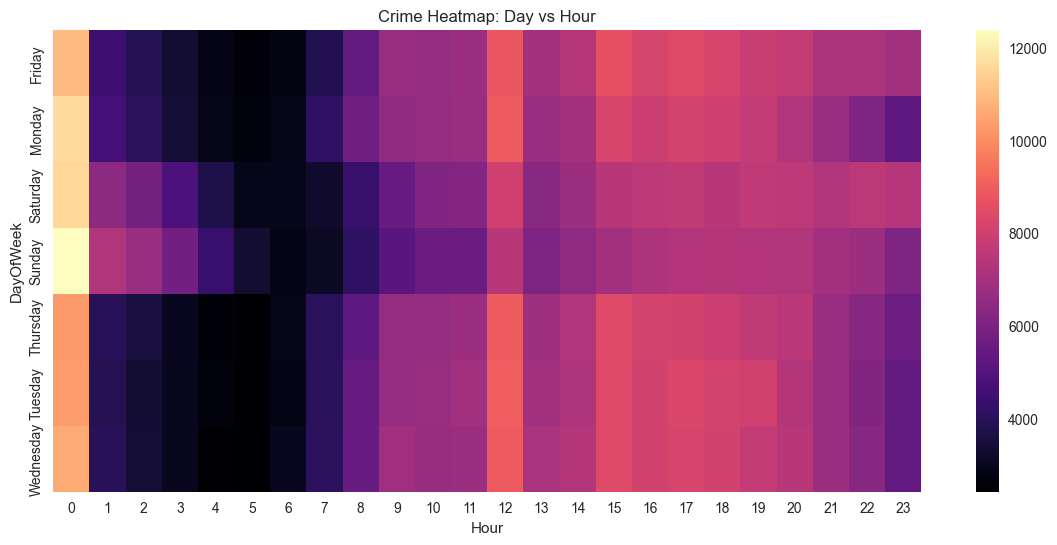

In [27]:
pivot = df.pivot_table(index="DayOfWeek", columns="Hour", values="ID", aggfunc="count")

plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap="magma")
plt.title("Crime Heatmap: Day vs Hour")
plt.show()

Correlation Heatmap

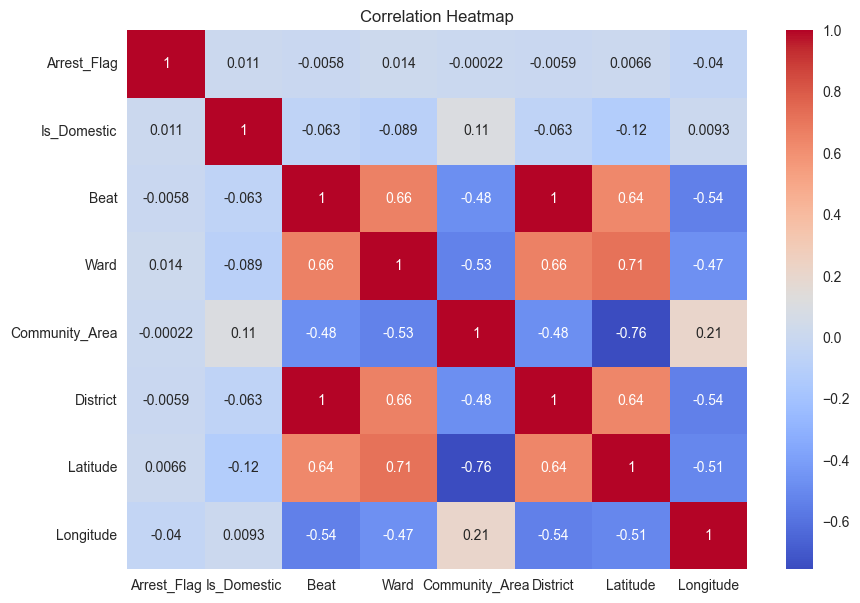

In [28]:
num_df = df[["Arrest_Flag", "Is_Domestic", "Beat", "Ward", "Community_Area",
             "District", "Latitude", "Longitude"]]

plt.figure(figsize=(10, 7))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
fig = px.bar(top_types,
             x=top_types.values,
             y=top_types.index,
             orientation='h',
             title="Top Crime Types (Interactive)",
             color=top_types.values)

fig.update_layout(height=600)
fig.show() 

Save EDA Summary to CSV

In [36]:
df_summary = {
    "total_crimes": len(df),
    "unique_primary_types": df["Primary_Type"].nunique(),
    "domestic_percent": df["Domestic"].mean(),
    "arrest_rate": df["Arrest_Flag"].mean(),
    "crime_category_counts": df["Crime_Category"].value_counts().to_dict(),
}

pd.DataFrame([df_summary]).to_csv("../visuals/eda_summary.csv", index=False)